In [14]:
import pandas as pd
import numpy as np
import math

In [193]:
books = pd.read_json('desktop/nyt2.json', lines=True, orient=True)
print(books.shape)
books.head()

(10195, 12)


,_id,amazon_product_url,author,bestsellers_date,description,price,published_date,publisher,rank,rank_last_week,title,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,{'$date': {'$numberLong': '1211587200000'}},"Odd Thomas, who can communicate with the dead,...",{'$numberInt': '27'},{'$date': {'$numberLong': '1212883200000'}},Bantam,{'$numberInt': '1'},{'$numberInt': '0'},ODD HOURS,{'$numberInt': '1'}
1,{'$oid': '5b4aa4ead3089013507db18c'},http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,{'$date': {'$numberLong': '1211587200000'}},Aliens have taken control of the minds and bod...,{'$numberDouble': '25.99'},{'$date': {'$numberLong': '1212883200000'}},"Little, Brown",{'$numberInt': '2'},{'$numberInt': '1'},THE HOST,{'$numberInt': '3'}
2,{'$oid': '5b4aa4ead3089013507db18d'},http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,{'$date': {'$numberLong': '1211587200000'}},A woman's happy marriage is shaken when she en...,{'$numberDouble': '24.95'},{'$date': {'$numberLong': '1212883200000'}},St. Martin's,{'$numberInt': '3'},{'$numberInt': '2'},LOVE THE ONE YOU'RE WITH,{'$numberInt': '2'}
3,{'$oid': '5b4aa4ead3089013507db18e'},http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,{'$date': {'$numberLong': '1211587200000'}},A Massachusetts state investigator and his tea...,{'$numberDouble': '22.95'},{'$date': {'$numberLong': '1212883200000'}},Putnam,{'$numberInt': '4'},{'$numberInt': '0'},THE FRONT,{'$numberInt': '1'}
4,{'$oid': '5b4aa4ead3089013507db18f'},http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,{'$date': {'$numberLong': '1211587200000'}},An aging porn queens aims to cap her career by...,{'$numberDouble': '24.95'},{'$date': {'$numberLong': '1212883200000'}},Doubleday,{'$numberInt': '5'},{'$numberInt': '0'},SNUFF,{'$numberInt': '1'}


In [207]:
books.dtypes

_id                   object
amazon_product_url    object
author                object
bestsellers_date      object
description           object
price                 object
published_date        object
publisher             object
rank                  object
rank_last_week        object
title                 object
weeks_on_list         object
dtype: object

In [209]:
# books = books[books['price'].str.replace("{''$numberInt': ", '')]

books['price'] = books['price'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: "{'$numberInt': '27'}"

In [177]:
books.head()

,_id,amazon_product_url,author,bestsellers_date,description,price,published_date,publisher,rank,rank_last_week,title,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,{'$date': {'$numberLong': '1211587200000'}},"Odd Thomas, who can communicate with the dead,...",{'$numberInt': '27'},{'$date': {'$numberLong': '1212883200000'}},Bantam,{'$numberInt': '1'},{'$numberInt': '0'},ODD HOURS,{'$numberInt': '1'}
1,{'$oid': '5b4aa4ead3089013507db18c'},http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,{'$date': {'$numberLong': '1211587200000'}},Aliens have taken control of the minds and bod...,{'$numberDouble': '25.99'},{'$date': {'$numberLong': '1212883200000'}},"Little, Brown",{'$numberInt': '2'},{'$numberInt': '1'},THE HOST,{'$numberInt': '3'}
2,{'$oid': '5b4aa4ead3089013507db18d'},http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,{'$date': {'$numberLong': '1211587200000'}},A woman's happy marriage is shaken when she en...,{'$numberDouble': '24.95'},{'$date': {'$numberLong': '1212883200000'}},St. Martin's,{'$numberInt': '3'},{'$numberInt': '2'},LOVE THE ONE YOU'RE WITH,{'$numberInt': '2'}
3,{'$oid': '5b4aa4ead3089013507db18e'},http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,{'$date': {'$numberLong': '1211587200000'}},A Massachusetts state investigator and his tea...,{'$numberDouble': '22.95'},{'$date': {'$numberLong': '1212883200000'}},Putnam,{'$numberInt': '4'},{'$numberInt': '0'},THE FRONT,{'$numberInt': '1'}
4,{'$oid': '5b4aa4ead3089013507db18f'},http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,{'$date': {'$numberLong': '1211587200000'}},An aging porn queens aims to cap her career by...,{'$numberDouble': '24.95'},{'$date': {'$numberLong': '1212883200000'}},Doubleday,{'$numberInt': '5'},{'$numberInt': '0'},SNUFF,{'$numberInt': '1'}


In [4]:
books.isnull().sum()

_id                   0
amazon_product_url    0
author                0
bestsellers_date      0
description           0
price                 0
published_date        0
publisher             0
rank                  0
rank_last_week        0
title                 0
weeks_on_list         0
dtype: int64

In [13]:
books.describe()

,_id,amazon_product_url,author,bestsellers_date,description,price,published_date,publisher,rank,rank_last_week,title,weeks_on_list
count,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195
unique,10195,2329,738,529,2972,38,529,176,20,17,2300,135
top,{'$oid': '5b4aa4ead3089013507dbf42'},http://www.amazon.com/All-Light-We-Cannot-See/...,John Grisham,{'$date': {'$numberLong': '1211587200000'}},,{'$numberInt': '0'},{'$date': {'$numberLong': '1212883200000'}},Putnam,{'$numberInt': '1'},{'$numberInt': '0'},ALL THE LIGHT WE CANNOT SEE,{'$numberInt': '1'}
freq,1,141,226,20,246,6184,20,1061,529,4174,141,2032


In [95]:
# Learning Plotly and Cufflinks

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

In [173]:
# Wrong code

# popauthor = books.count().sort_values('author', ascending=False)

# # popauthor = books[books['author'].sum() > 20]

# # books['author'].iplot(kind='hist', xTitle='Author', yTitle='Weeks on NYT List')

# popauthor

In [44]:
# Right code!

popauthors = pd.DataFrame(books['author'].value_counts())

In [45]:
popauthors

,author
John Grisham,226
David Baldacci,222
Danielle Steel,174
Stephen King,157
Anthony Doerr,141
Nicholas Sparks,136
Kristin Hannah,128
Stieg Larsson,121
George R R Martin,119
James Patterson and Maxine Paetro,119


In [53]:
# Taking the top of the list

popauthors2 = popauthors[:13]

In [62]:
popauthors2

,author
John Grisham,226
David Baldacci,222
Danielle Steel,174
Stephen King,157
Anthony Doerr,141
Nicholas Sparks,136
Kristin Hannah,128
Stieg Larsson,121
George R R Martin,119
James Patterson and Maxine Paetro,119


In [87]:
# Had trouble working with initial dataframe. Was treating the authors as index.

# popauthors2.columns = ['author', 'weeks on list']

authors = ['John Grisham',
'David Baldacci',
'Danielle Steel',
'Stephen King',
'Anthony Doerr',
'Nicholas Sparks',
'Kristin Hannah',
'Stieg Larsson',
'George R R Martin',
'James Patterson and Maxine Paetro',
'James Patterson',
'Kathryn Stockett',
'Janet Evanovich']

weeks = [226,
222,
174,
157,
141,
136,
128,
121,
119,
119,
115,
114,
111]

top13authors = pd.DataFrame()

In [88]:
# Creating previous dataframe from scratch to save time

top13authors['authors'] = authors
top13authors['weeks'] = weeks

In [83]:
import plotly
plotly.__version__

'3.9.0'

In [89]:
top13authors

,authors,weeks
0,John Grisham,226
1,David Baldacci,222
2,Danielle Steel,174
3,Stephen King,157
4,Anthony Doerr,141
5,Nicholas Sparks,136
6,Kristin Hannah,128
7,Stieg Larsson,121
8,George R R Martin,119
9,James Patterson and Maxine Paetro,119


In [92]:
# These plotting attempts didn't go as planned.

# data = [go.Bar(x = top13authors['authors'], y = top13authors['weeks'],
#               orientation='h')]

In [100]:
# def categoryChart():
#     return {'data': [
#         go.Bar(
#         x = top13authors['authors'],
#         y = top13authors['weeks'],
#         orientation = 'h',
#         marker = dict(
#         line = dict(color='#ffffff', width=1)
#         ),
#         ),
#     ],
#            'layout': go.Layout(
#            font=dict(size=10),
#            )}

In [104]:
# categoryChart()

In [107]:
# fig = go.Figure(data=top13authors)
# py.iplot(fig, filename='top13')

In [111]:
import matplotlib.pyplot as plt

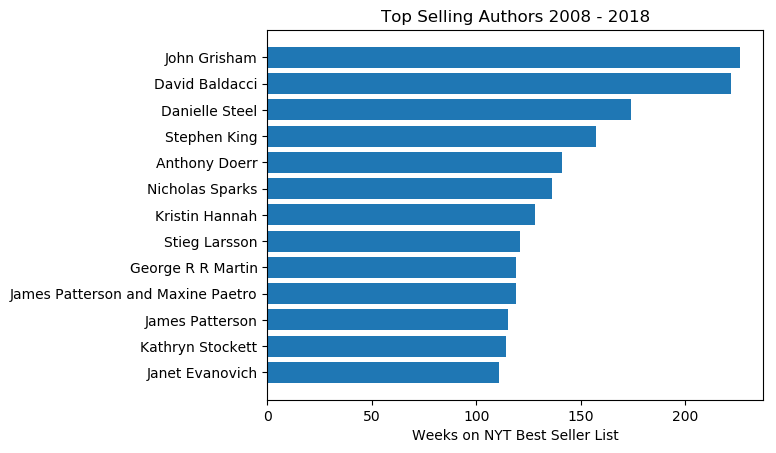

In [112]:
# Fed up with Plotly so used matplotlib for this

plt.rcdefaults()
fig, ax = plt.subplots()
people = authors
weeks = weeks

y_pos = np.arange(len(people))

ax.barh(y_pos, weeks, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()
ax.set_xlabel('Weeks on NYT Best Seller List')
ax.set_title('Top Selling Authors 2008 - 2018')
plt.show();

In [115]:
! pip install wordcloud

    100% |████████████████████████████████| 163kB 2.7MB/s ta 0:00:01


In [116]:
# Attempting to create a wordcloud from book descriptions

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [117]:
text = ''.join(review for review in books['description'])

In [118]:
print('there are {} words in the combination of all reviews'.format(len(text)))

there are 1016221 words in the combination of all reviews


In [160]:
stopwords = set(STOPWORDS)

In [161]:
stopwords.update(['black', 'white', 'year', 'boy', 'girl'])

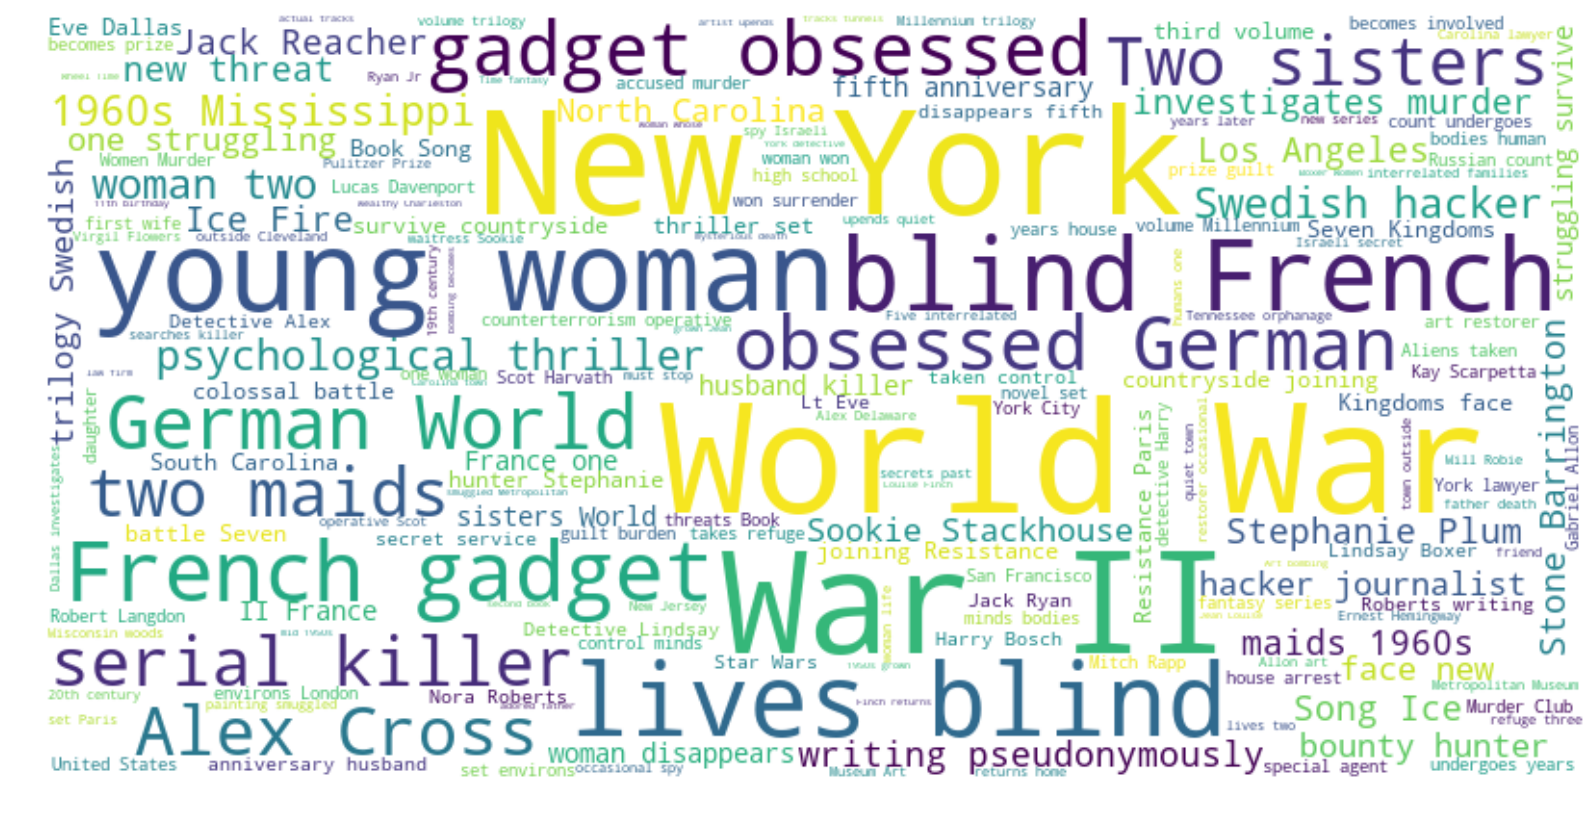

In [171]:
wordcloud = WordCloud(width=800, height=400, stopwords = stopwords, max_words = 180, 
                      max_font_size = 80,
                      background_color='white').generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

In [172]:
wordcloud.to_file('desktop/books_wordcloud5.png')

In [ ]:
with open('desktop/nyt2.json', 'w') as write_file:
    json_string = json.dumps(data)

In [194]:
poppublishers = books['publisher'].value_counts()

In [202]:
pd.options.display.max_rows = 200

In [203]:
print(poppublishers)

Putnam                                     1061
Little, Brown                               943
Grand Central                               619
Knopf                                       559
Doubleday                                   475
Scribner                                    456
Ballantine                                  421
Delacorte                                   347
Bantam                                      319
Simon & Schuster                            308
St. Martin's                                301
Viking                                      269
Random House                                252
Morrow/HarperCollins                        240
Dutton                                      231
Harper                                      211
Riverhead                                   199
Amy Einhorn/Putnam                          185
Atria                                       183
St. Martin’s                                178
Harper/HarperCollins                    

In [196]:
publishers = ['Putnam',
'Little, Brown',
'Grand Central',
'Knopf',
'Doubleday',
'Scribner',
'Ballantine',
'Delacorte',
'Bantam',
'Simon & Schuster',
'St. Martins',
'Viking',
'Random House']

weeks = [1061,
943,
619,
559,
475,
456,
421,
347,
319,
308,
301,
269,
252]

In [198]:
poppublishersdf = pd.DataFrame()
poppublishersdf['publisher'] = publishers
poppublishersdf['weeks'] = weeks

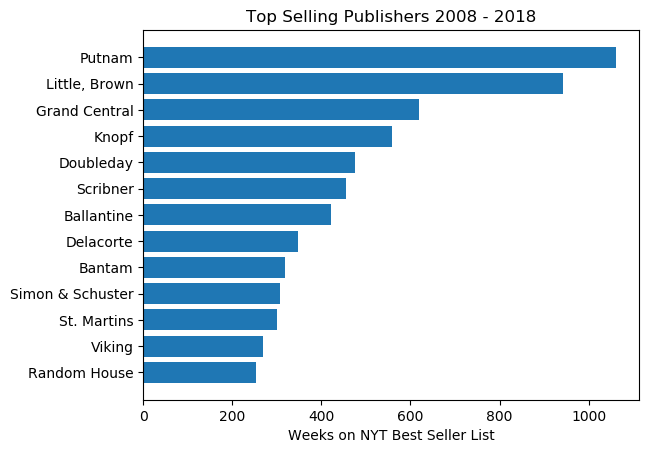

In [199]:
plt.rcdefaults()
fig, ax = plt.subplots()
publishers = publishers
weeks = weeks

y_pos = np.arange(len(publishers))

ax.barh(y_pos, weeks, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(publishers)
ax.invert_yaxis()
ax.set_xlabel('Weeks on NYT Best Seller List')
ax.set_title('Top Selling Publishers 2008 - 2018')
plt.show();